### Mushroom dataset / SHAP & LIME
#### cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
#### cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
#### cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
#### bruises: bruises=t,no=f
#### odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
#### gill-attachment: attached=a,descending=d,free=f,notched=n
#### gill-spacing: close=c,crowded=w,distant=d
#### gill-size: broad=b,narrow=n
#### gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
#### stalk-shape: enlarging=e,tapering=t
#### stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
#### stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
#### stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
#### stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
#### stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
#### veil-type: partial=p,universal=u
#### veil-color: brown=n,orange=o,white=w,yellow=y
#### ring-number: none=n,one=o,two=t
#### ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
#### spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
#### population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
#### habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [52]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go 
import plotly.tools as tls 
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

### Part 1 EDA

In [3]:
df = pd.read_csv('mushrooms.csv')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.info() # Overview of the dataset  -- 8124 instances and 23 features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
df.dtypes # Data types of the features in the dataset -- 23 categorical features

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [10]:
df.nunique() # Number of unique feature values in the dataset

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [11]:
df.describe() # Statistics of the columns -- e.g top shows the highest-occurring categorical values, freq shows the frequency/count of the highest-occurring categorical value.

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [12]:
for col in df.select_dtypes(include=[object]):  # Overview of our categorical variables -- Name of the unique feature values of each categorical feature 
    print(col,":", df[col].unique())            # For the detailed information about meaning of feature values, please visit the first cell in the notebook

class : ['p' 'e']
cap-shape : ['x' 'b' 's' 'f' 'k' 'c']
cap-surface : ['s' 'y' 'f' 'g']
cap-color : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises : ['t' 'f']
odor : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment : ['f' 'a']
gill-spacing : ['c' 'w']
gill-size : ['n' 'b']
gill-color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape : ['e' 't']
stalk-root : ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring : ['s' 'f' 'k' 'y']
stalk-surface-below-ring : ['s' 'f' 'y' 'k']
stalk-color-above-ring : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type : ['p']
veil-color : ['w' 'n' 'o' 'y']
ring-number : ['o' 't' 'n']
ring-type : ['p' 'e' 'l' 'f' 'n']
spore-print-color : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population : ['s' 'n' 'a' 'v' 'y' 'c']
habitat : ['u' 'g' 'm' 'd' 'p' 'w' 'l']


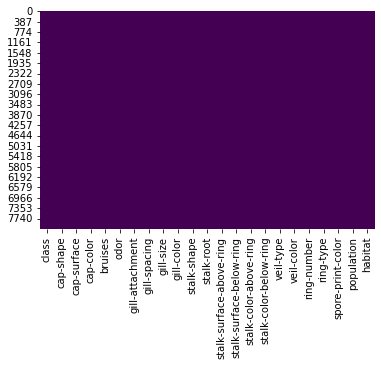

In [13]:
sns.heatmap(df.isnull(), cbar=False,cmap = 'viridis') # Represantion of missing values as heatmap -- No missing value

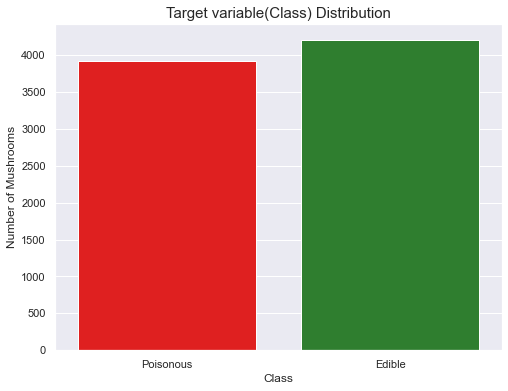

In [23]:
sns.set(rc = {'figure.figsize':(8,6)})
g1 = sns.countplot(x="class",data= df, 
              palette= ['red', 'forestgreen'])                   # Target variable distrubtion -- balanced dataset
g1.set_xticklabels(['Poisonous', 'Edible',])
g1.set_title("Target variable(Class) Distribution", fontsize=15)
g1.set_xlabel("Class")
g1.set_ylabel("Number of Mushrooms")
plt.show()

Text(0.5, 1.0, 'Distribution of the Mushrooms across Cap Shapes with Class Categorization')

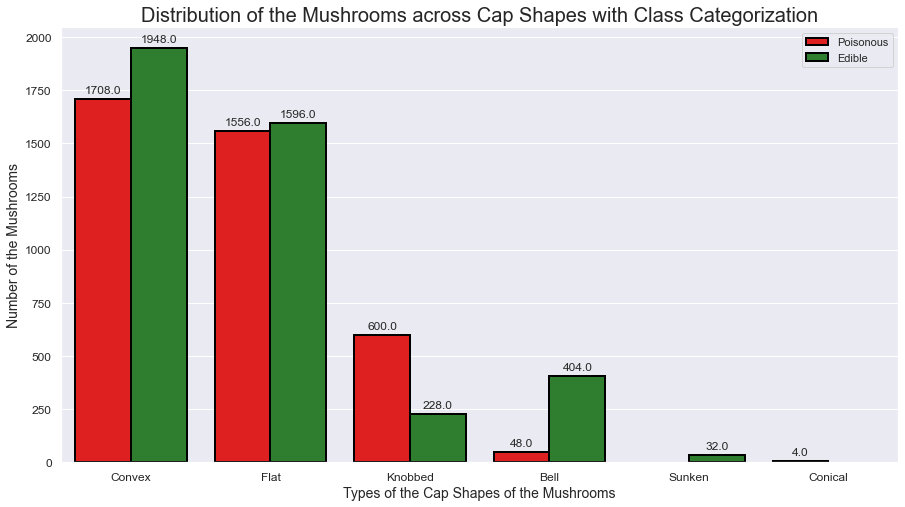

In [21]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df, x='cap-shape',
                      hue='class',
                      order=df['cap-shape'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Convex', 'Flat', 'Knobbed', 'Bell', 'Sunken', 'Conical'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Cap Shapes of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms across Cap Shapes with Class Categorization', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms across Cap Surfaces with Class Categorization')

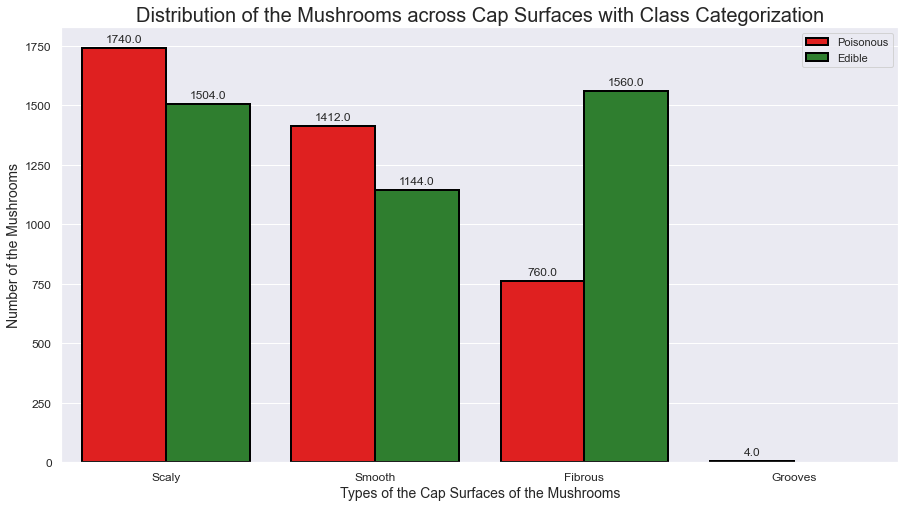

In [25]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df, x='cap-surface',
                      hue='class',
                      order=df['cap-surface'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Scaly', 'Smooth', 'Fibrous', 'Grooves'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Cap Surfaces of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms across Cap Surfaces with Class Categorization', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms across Cap Colors with Class Categorization')

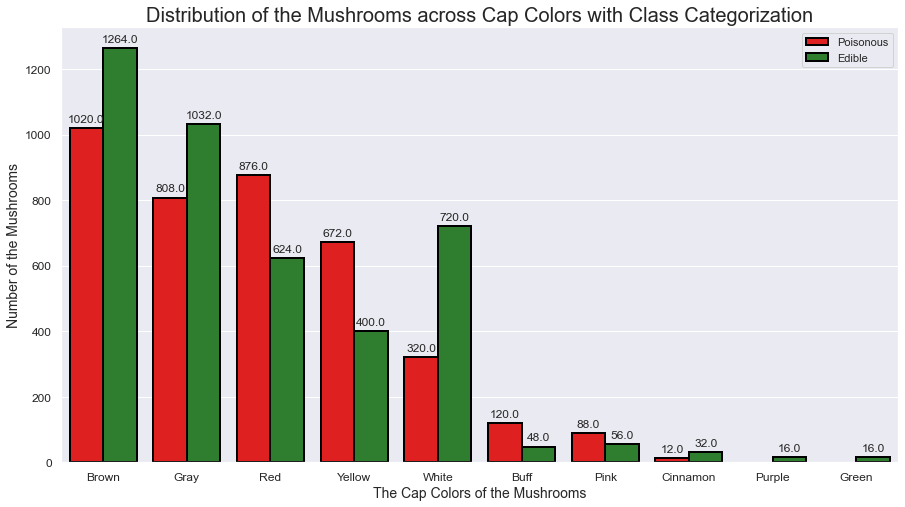

In [26]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=df, x='cap-color',
                      hue='class',
                      order=df['cap-color'].value_counts().index,
                      palette=['red', 'forestgreen'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)
                      
splot.set_xticklabels(['Brown', 'Gray', 'Red', 'Yellow', 'White', 'Buff', 'Pink', 'Cinnamon', 'Purple', 'Green'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
                   
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('The Cap Colors of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms across Cap Colors with Class Categorization', fontsize=20)

In [27]:
### Please find the distribution of mushrooms by their gill colors, stalk root, below ring vs Classes

### Part 2 XAI Part

In [31]:
labelencoder= LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [32]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


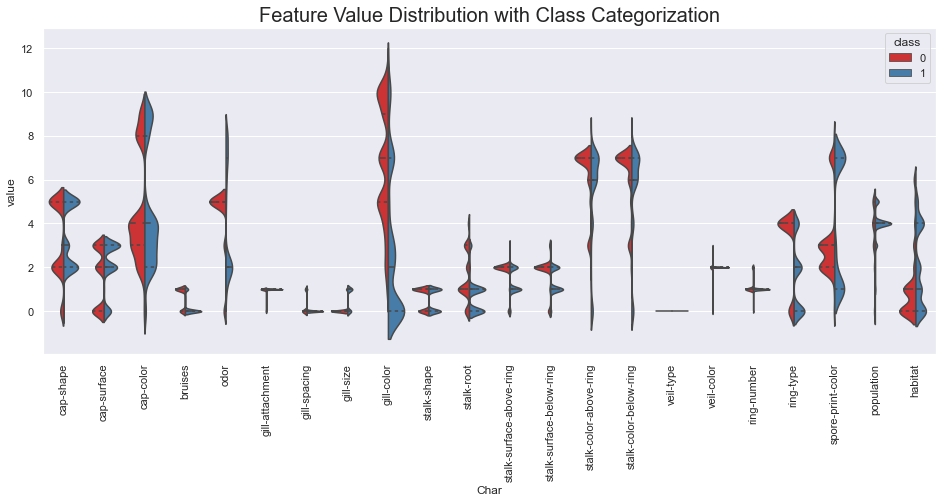

In [42]:
df_melt = pd.melt(df, "class", var_name= "Char")
fig, ax = plt.subplots(figsize=(16,6))
p = sns.violinplot(ax = ax, x= "Char", y= "value", hue= "class", split = True, data=df_melt, inner = "quartile", palette = "Set1")
df_no_class = df.drop(["class"],axis = 1)
plt.title('Feature Value Distribution with Class Categorization', fontsize=20)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));
# gill color, odor and gill size looks like the most important factors that can distinguish poisinous and edible 

In [45]:
X = df.drop(["class"], axis=1)
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [48]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Text(0.5, 0, 'Decision Tree Feature Importance')

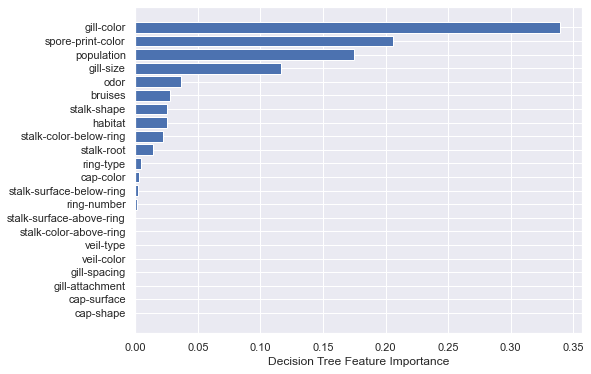

In [50]:
sorted_idx = dt.feature_importances_.argsort()
features_list = X.columns.values
plt.barh(features_list[sorted_idx], dt.feature_importances_[sorted_idx])
plt.xlabel("Decision Tree Feature Importance")

In [ ]:
## We analyze the Mushroom data and its characteristics. 
## Let's apply SHAP and LIME on this classifier to explain local predictions
## Compare SHAP and LIME outputs with Feature importance graph, and write down your findings. 